In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns

df = pd.read_excel('R:\\Bunmi\\SHG_LIF_Files\\MaxProjFiberAnalysis1.xlsx', sheet_name='Fiji-diff')
df.head()

,Exp,Sample,Area,Perimeter,EllipseMajor,EllipseMinor,EllipseAngle,Feret,FeretX,FeretY,...,Exp.1,trt,time,Samp,Area_diff,Length_diff,Width_diff,%Diff_Area,%Diff_Length,%Diff_Width
0,09-30,Ctrl_2mins,172740.849,41276.383,1452.992,151.371,171.936,1411.346,642.0,87.0,...,07-22,Trt,2m,2mins,18103.564,51.666,8.592,7.467701,2.339664,3.946226
1,09-30,Ctrl_2mins1,241231.231,82719.063,1491.230,205.968,158.044,1395.618,460.0,192.0,...,07-22,Trt,2m,2mins1,11609.794,45.413,-28.708,2.791211,1.532407,-10.625155
2,09-30,Ctrl_20mins,240030.436,67451.223,1741.077,175.533,171.587,1631.690,524.0,89.0,...,07-22,Trt,20m,20mins,37238.413,53.520,14.185,17.004377,2.561866,6.979468
3,09-30,Ctrl_20mins1,200742.635,41182.492,1384.279,184.640,4.808,1290.836,585.0,735.0,...,07-22,Trt,20m,20mins1,62992.387,183.568,43.063,25.075370,8.945168,26.058043
4,09-30,Ctrl_40mins,356156.968,55583.212,2130.185,212.880,11.126,1957.513,709.0,1677.0,...,07-22,Trt,40m,40mins1,200581.057,-3492.667,-706.209,65.328199,-61.848400,-66.373026


In [47]:
df[(df['Exp'] == '10-02')]['trt'].unique()

array(['Trt', 'Ctrl'], dtype=object)

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_24200\440323734.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor = (1, 1))


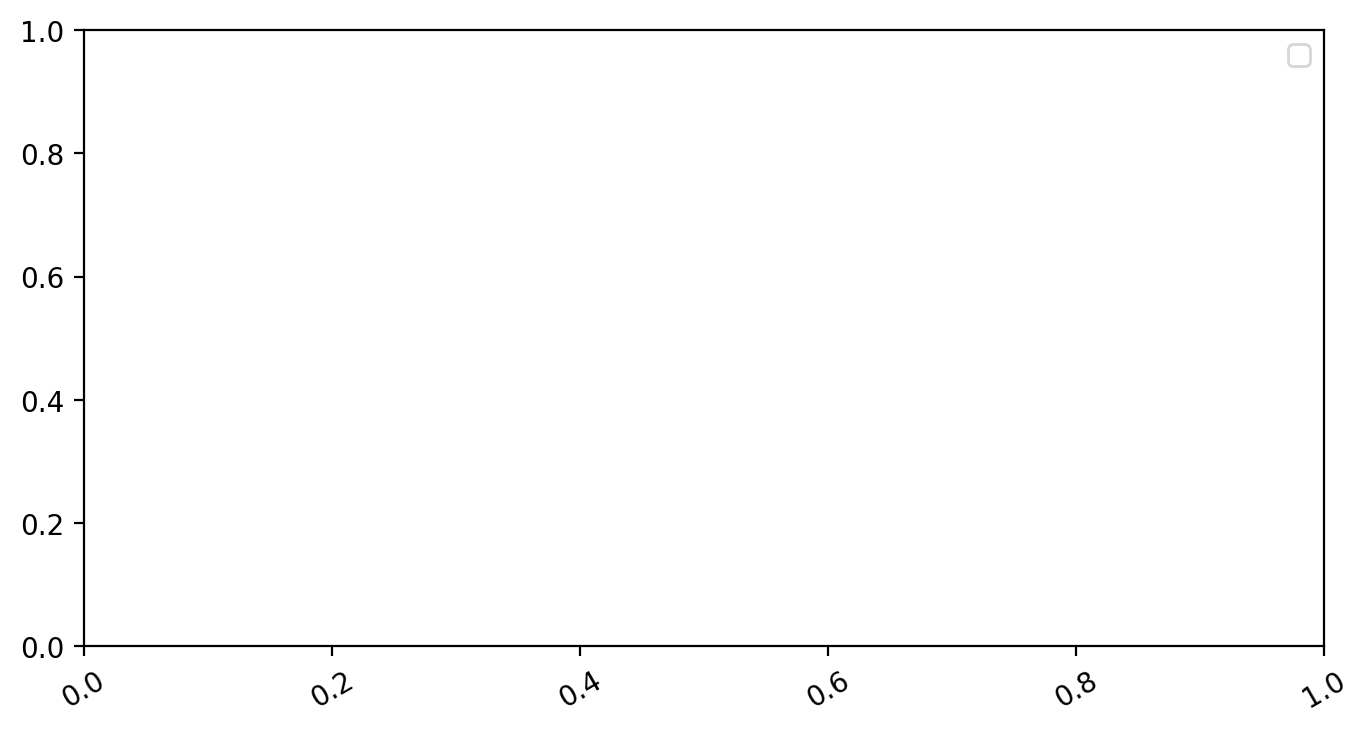

In [8]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.barplot(
    data = df[(df['Exp'] == '07-22') ],
    x = 'Samp',
    y = '%Diff-Length',
    hue = 'trt',
    #hue_order = ['Ctrl', 'Trt'],#'CtrlRF', 
   # order = ['2m', '20m', '40m', '60m'],#'0m', 
    errorbar='sd'
)
#plt.xticks(rotation = 30)
'''sns.barplot(
    data = df[(df['Exp'] == '07-22') & (df['Sample'].str.contains('RF')) ],
    x = 'trt',
    hue = 'Sample',
    y = 'Length',
)'''
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1, 1))

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2354733448.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\2354733448.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(


<Axes: xlabel='time', ylabel='%Diff_Area'>

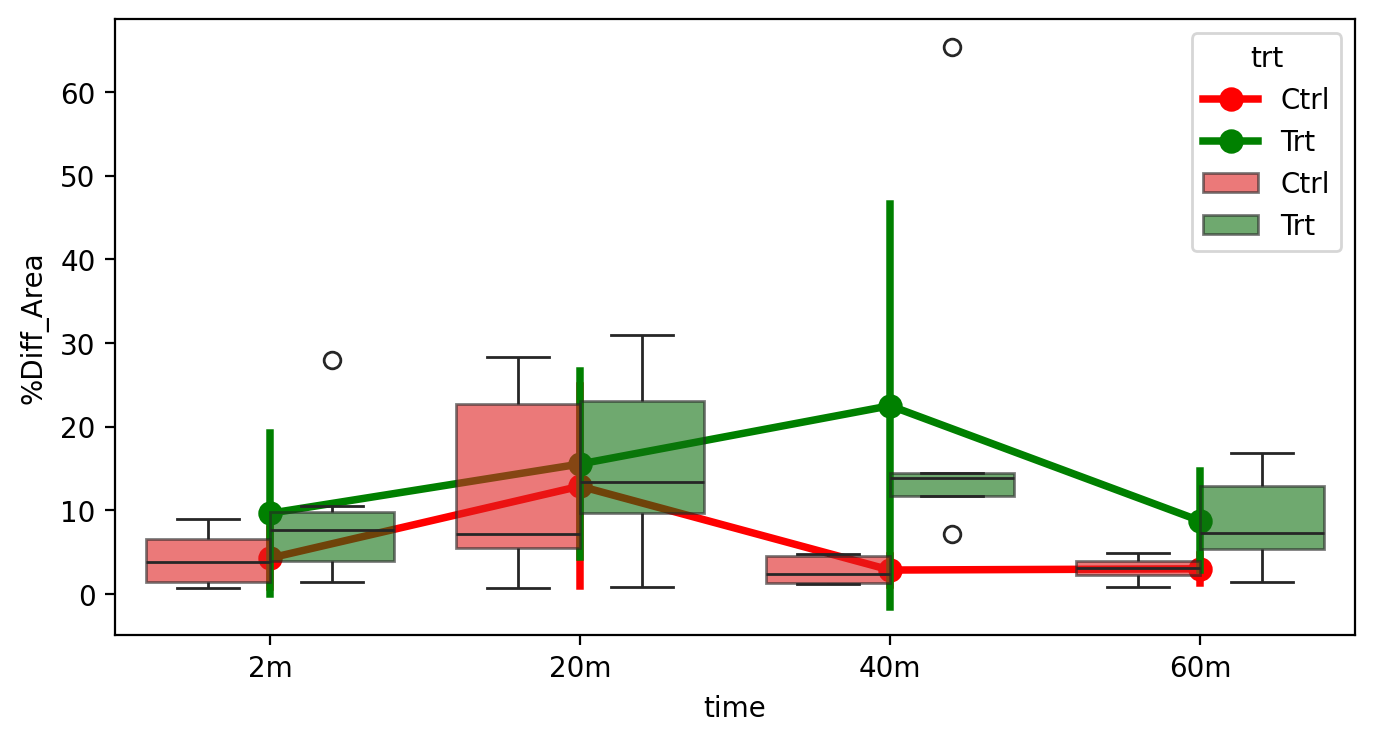

In [11]:
plt.figure(figsize = (8, 4), dpi = 200);
sns.pointplot(
    data = df1, #[(df['Exp'] == '09-30') ],
    x = 'time',
    y = '%Diff_Area',
    hue = 'trt',
    hue_order = ['Ctrl', 'Trt'],
   # order = ['0m', '2m', '20m', '40m', '60m'],
    errorbar='sd',
    #alpha = .6,
    palette = ['red', 'green', 'blue']
)
sns.boxplot(
    data = df1, #[(df['Exp'] == '09-30') ],
    x = 'time',
    y = '%Diff_Area',
    hue = 'trt',
    hue_order = ['Ctrl', 'Trt'],
    #order = ['0m', '2m', '20m', '40m', '60m'],
  # alpha = .6,
   #dodge = .02,
   boxprops=dict(alpha=.6),#,lineArea=1, facecolor='w', edgecolor='k', 
palette = ['red', 'green', 'blue']
)


In [7]:
df1 = df.copy()
df1[['%Diff_Area',	'%Diff_Length',	'%Diff_Width']] = df1[['%Diff_Area',	'%Diff_Length',	'%Diff_Width']].abs()

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:15: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.stripplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.pointplot(
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_10916\3727214931.py:15: UserWarning: The palet

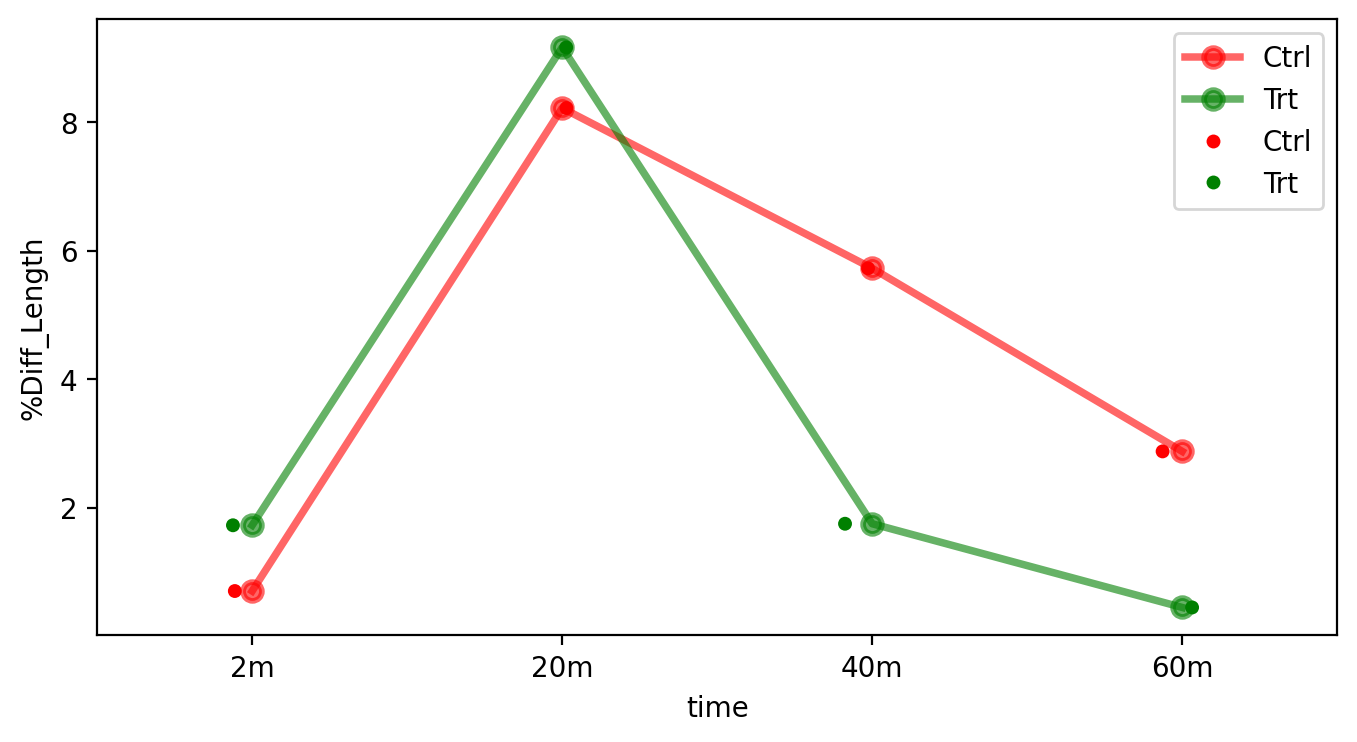

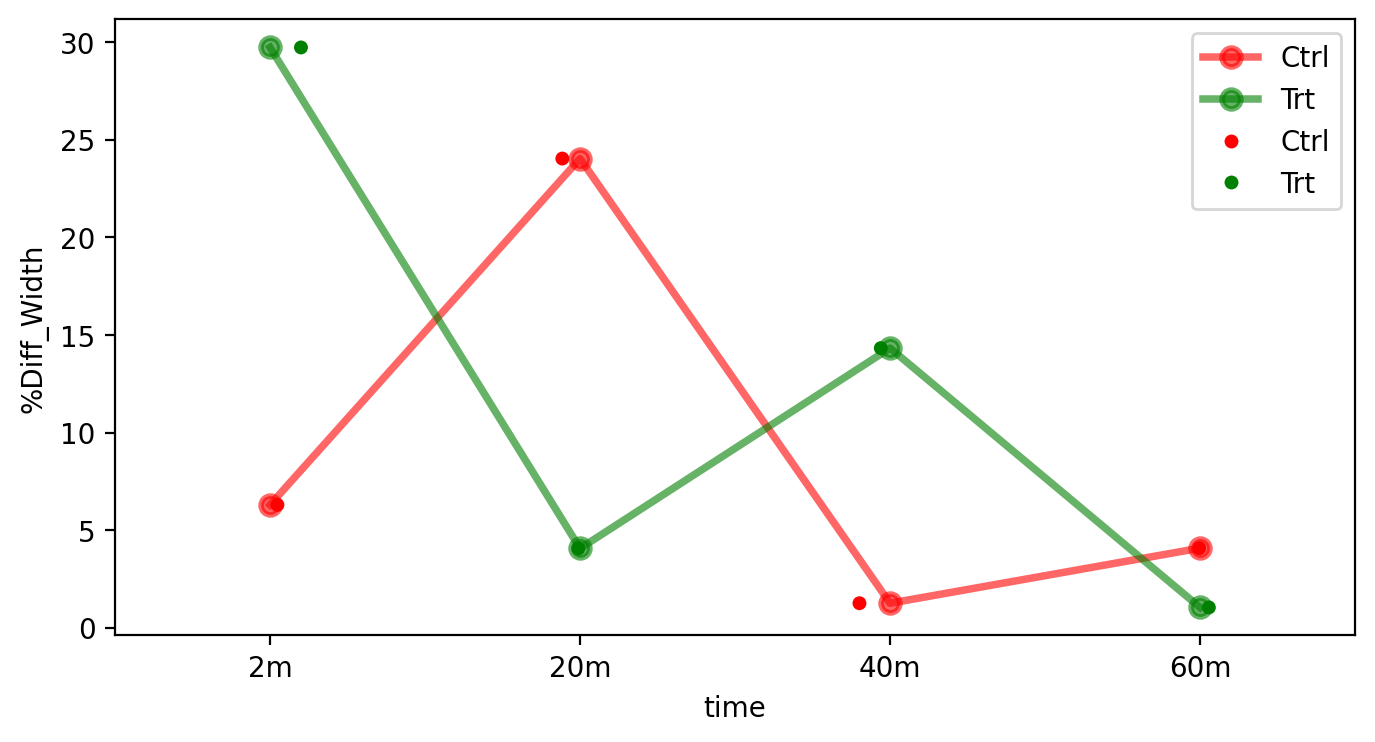

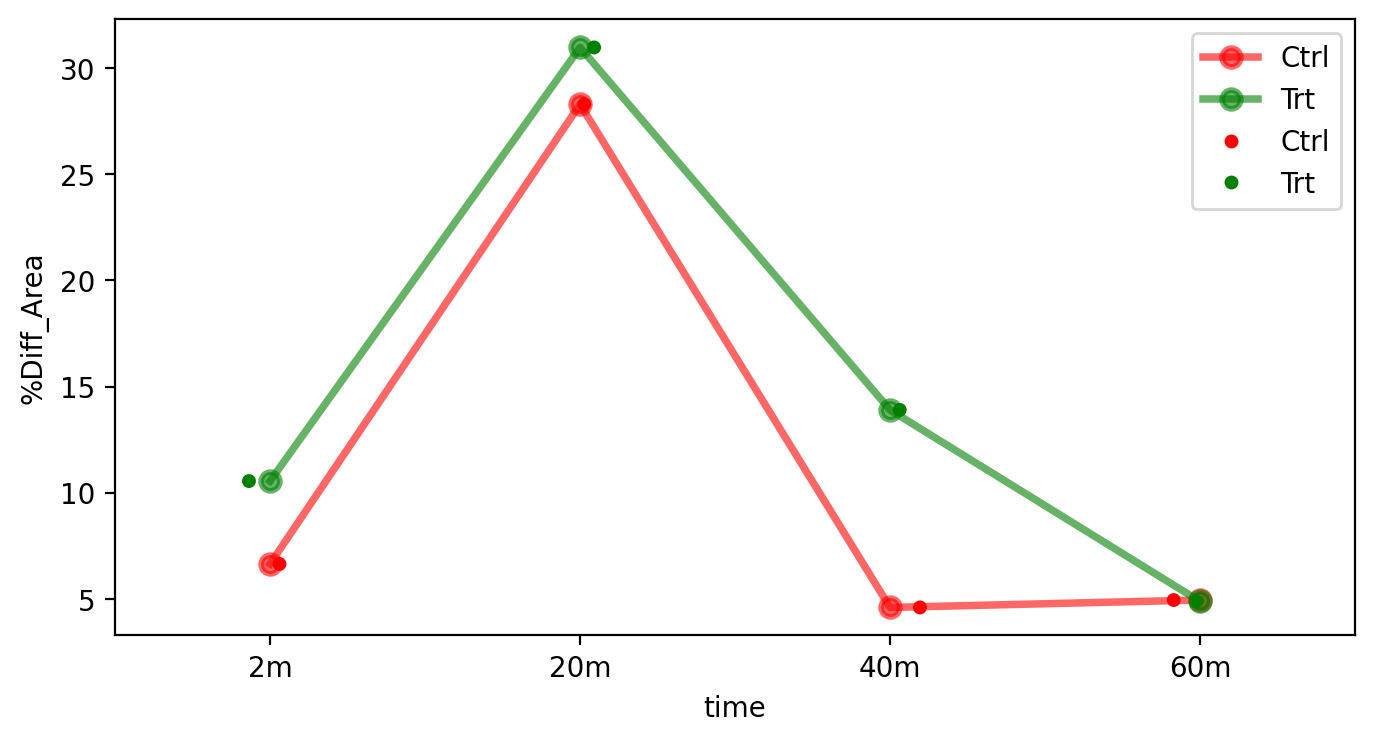

In [8]:
for col in ['%Diff_Length', '%Diff_Width', '%Diff_Area']:
    plt.figure(figsize = (8, 4), dpi = 200);
    sns.pointplot(
        data = df1[(df1['Exp.1'] == '08-08')],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],#'CtrlRF', 
    # order = ['0m', '2m', '20m', '40m', '60m'],
        errorbar='sd',
        alpha = .6,
        palette = ['red', 'green', 'blue'],
    estimator = 'mean',
    );
    sns.stripplot(
        data = df1[(df1['Exp.1'] == '08-08')],
        x = 'time',
        y = col,
        hue = 'trt',
        hue_order = ['Ctrl', 'Trt'],
        #order = ['0m', '2m', '20m', '40m', '60m'],
    # alpha = .6,
    #dodge = .02,
    #boxprops=dict(alpha=.6),#,lineWidth=1, facecolor='w', edgecolor='k', 
    palette = ['red', 'green', 'blue'],
    #errorbar='sd'
    );
    plt.legend(bbox_to_anchor = (1, 1));